In [1]:
#Elizabeth Pieters
#Problem 3, Problem set 1

In [2]:
import numpy as np
import scipy.interpolate as sp_int
import matplotlib.pyplot as mpl

In [3]:
#first define the fitting functions

#inputs: data xi, yi, and desired interpolation x data x_test
def fit_poly(xi, yi, x_test):
    #have a polynomial ZERO at all the points but one, multiply that by the value at one, then muliply it all together
    order = num_points-1
    y_poly = np.zeros(num_test_points)

    mpl.figure()                                #will be plotting in loop
    for ii in range(num_points):                #need to do for every data point
        x_temp = np.append(xi[:ii], xi[ii+1:])  #remove point ii from the array
        coeff = np.prod(xi[ii] - x_temp)        #coefficient necessary to normalize polynomial 
        p0 = 1                                  #initialize polynomial at 1 to iteratively multiply by it

        for xx in x_temp:                       #evaluate each polynomial
            p0 = p0*(x_test - xx)               #generate the polynomial for each test point
        p0 = p0 / coeff                         #divide by the necessary coefficient to normalize it
        mpl.plot(x_test, p0)

        #scale polynomial so that it achieves the correct y value at the data point where it's nonzero, sum
        y_poly += p0*yi[ii]                     #sum all the scaled polynomials

    mpl.title('Individual normalized polynomials for polynomial fit')
    mpl.show()                                  #end loop plotting
    
    return y_poly



def rat_fit_full(xi, yi, n, m, x_test, SING_MAT = False):
    p, q = rat_fit(xi, yi, n, m, SING_MAT)
    return rat_eval(p, q, x_test)


def rat_fit(xi, yi, n, m, SING_MAT = False):
    mat = np.zeros([n+m-1, n+m-1])             #init square matrix
    for ii in range(n):                        #fill in p section, 1, x, ... x**n
        mat[:, ii] = xi**ii
        #print('n ii', ii, mat)
    for i, ii in enumerate(range(n, n+m-1)):   #fill in q section, -yx, ... -yx**m
        mat[:, ii] = -yi*xi**(i+1)             #power for x starts at 1
        #print('m ii', ii, mat)
    if SING_MAT:                                   #use pinv which helps with singular matrices 
        coeff=np.dot(np.linalg.pinv(mat),yi)        #invert and multiply matrix to solve for p,q coefficients
    else:
        coeff=np.dot(np.linalg.inv(mat),yi)         #invert and multiply matrix to solve for p,q coefficients
    p=coeff[:n]
    q=coeff[n:]
    print('p and q are ', p, q)
    #print('my rat fit ', mat)
    #print(coeff)
    return p, q
    

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):     #evaluate p
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):     #evaluate q
        bot=bot+q[i]*x**(i+1)
    return top/bot
    
def rat_fit_JS(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    #print('js rat fit ', mat)
    #print(pars)
    return p,q

In [4]:
#define main body function which will compare the interpolation methods for the data fed in

def interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, DEBUG=False, SING_MAT=False, RAT_ONLY=False):
    
    if not RAT_ONLY: #have setting for only rational function for playing around with n and m
        #polynomial interpolation
        y_poly = fit_poly(xi, yi, x_test)
        rmse_poly = np.std(y_poly - y_true) #root mean squared error
        #print('root mean squared error for polynomial fit: ', rmse_poly)

        mpl.figure()
        mpl.plot(xi, yi, '*')
        mpl.plot(x_test, y_true)
        mpl.plot(x_test, y_poly)
        mpl.title('Polynomial fit')
        mpl.legend(['Data points', 'True', 'Interpolation'])
        mpl.show()


        #cubic spline
        cs = sp_int.CubicSpline(xi, yi)
        rmse_cs = np.std(cs(x_test) - y_true)
        #print('root mean squared error for cublic spline: ', rmse_cs)

        mpl.figure()
        mpl.plot(xi, yi, '*')
        mpl.plot(x_test, y_true)
        mpl.plot(x_test, cs(x_test))
        mpl.title('Cubic spline fit')
        mpl.legend(['Data points', 'True', 'Interpolation'])
        mpl.show()


    #rational function interpolation
    y_rf = rat_fit_full(xi, yi, n, m, x_test, SING_MAT)
    rmse_rf = np.std(y_rf - y_true)
    #print('root mean squared error for rat fit: ', rmse_rf)

    mpl.figure()
    mpl.plot(xi, yi, '*')
    mpl.plot(x_test, y_true)
    mpl.plot(x_test, y_rf)
    mpl.title('Rational function fit with n ' + str(n) + ' and m ' + str(m))
    mpl.legend(['Data points', 'True', 'Interpolation'])
    mpl.show()


    if DEBUG and not SING_MAT:
        # SANITY CHECK : Does my modified ratfit function get the same as JSievers
        p, q = rat_fit_JS(xi,yi,n,m)
        y_rf_js = rat_eval(p,q,x_test)

        mpl.figure()
        mpl.plot(xi, yi, '*')
        mpl.plot(x_test, y_true)
        mpl.plot(x_test, y_rf_js)
        mpl.title('J Sievers rational function fit')
        mpl.legend(['Data points', 'True', 'Interpolation'])
        mpl.show()
        
    print('IN SUMMARY: the root mean square error for each type of interpolation is listed below:')
    if not RAT_ONLY:
        print('     POLYNOMIAL: ', rmse_poly)
        print('     CUBIC SPLINE: ', rmse_cs)
    print('     RATIONAL POLY: ', rmse_rf)
    

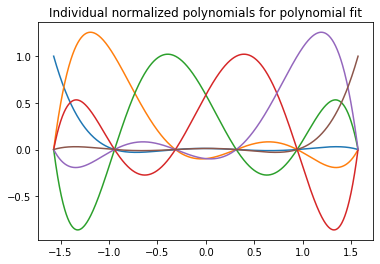

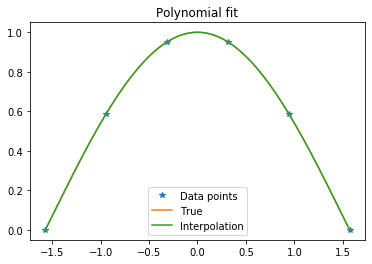

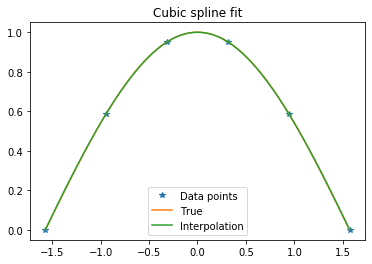

p and q are  [ 1.00052520e+00  2.46519033e-32 -4.05497591e-01] [-1.80411242e-16  1.00651217e-01 -2.22044605e-16]


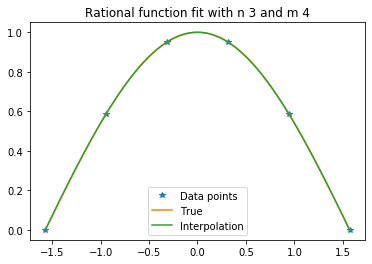

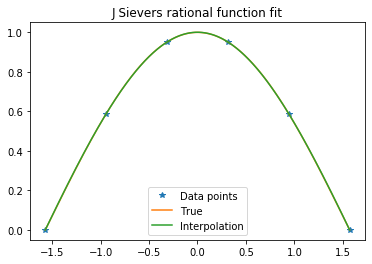

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     POLYNOMIAL:  0.0005489936164600035
     CUBIC SPLINE:  0.0012417728867589132
     RATIONAL POLY:  0.0008555136038120501


In [5]:
#RUN THE COMPARISON WITH COSINE
n = 3
m = 4
num_points = n + m - 1 #make sure the number of points works for the thing
num_test_points = 1042
xi = np.linspace(-np.pi/2, np.pi/2, num_points) #x data for cos function
yi = np.cos(xi) # y data for cos function
x_test = np.linspace(xi[0], xi[-1], num_test_points)
y_true = np.cos(x_test)

interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, DEBUG=True)

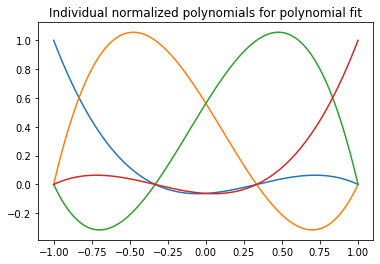

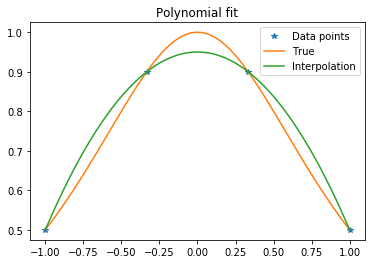

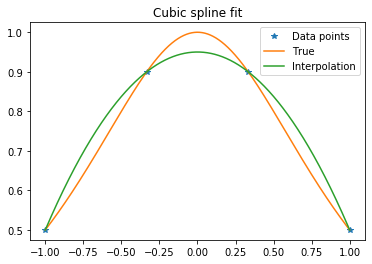

p and q are  [1.0000000e+00 4.4408921e-16] [8.8817842e-16 1.0000000e+00]


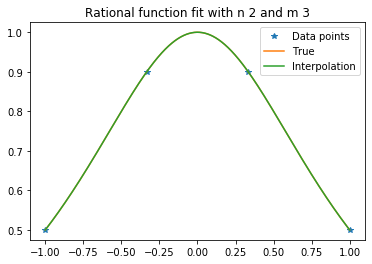

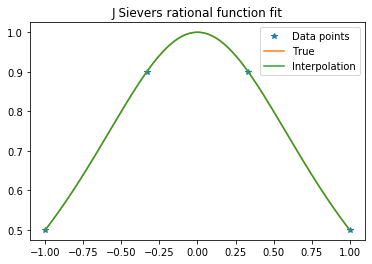

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     POLYNOMIAL:  0.03701219817869801
     CUBIC SPLINE:  0.03701219817869799
     RATIONAL POLY:  1.205479168455439e-16


In [6]:
#RUN THE COMPARISON WITH LORENTZIAN
n = 2
m = 3
num_points = n + m - 1 #make sure the number of points works for the thing
num_test_points = 1042
xi = np.linspace(-1, 1, num_points) #x data for lorentzian
yi = 1 / (1 + xi**2) # y data for lorentzian
x_test = np.linspace(xi[0], xi[-1], num_test_points)
y_true = 1 / (1 + x_test**2)

interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, DEBUG=True, SING_MAT=False)

p and q are  [1.] [0. 1.]


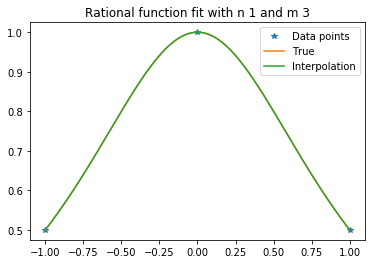

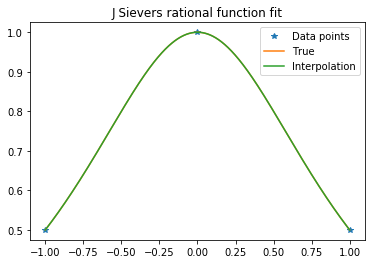

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     RATIONAL POLY:  0.0

 BELOW: using np.linalg.inv
p and q are  [ 2.65837104  4.         -0.03159467] [3.  1.  1.5]


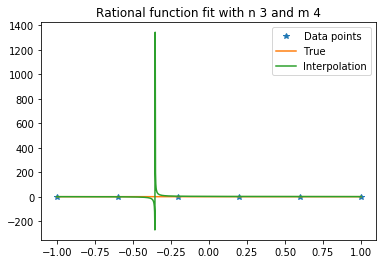

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     RATIONAL POLY:  43.594516436233256

 BELOW: using np.linalg.pinv
p and q are  [ 1.00000000e+00 -1.94289029e-16  1.55431223e-15] [-2.22044605e-16  1.00000000e+00  4.44089210e-16]


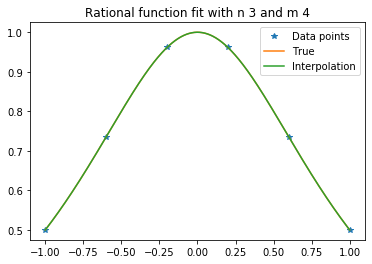

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     RATIONAL POLY:  2.308025374838602e-16

 BELOW: using np.linalg.inv
p and q are  [ -4.29862069 -20.           2.           3.96729867] [-14.   4.  -2.   0.]


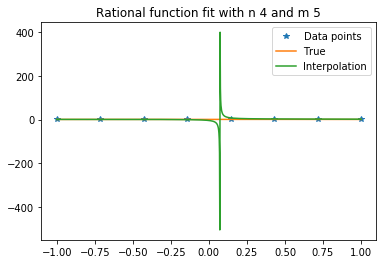

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     RATIONAL POLY:  22.027352577839462

 BELOW: using np.linalg.pinv
p and q are  [ 1.00000000e+00  8.88178420e-16 -3.33333333e-01 -1.77635684e-15] [ 8.88178420e-16  6.66666667e-01 -8.88178420e-16 -3.33333333e-01]


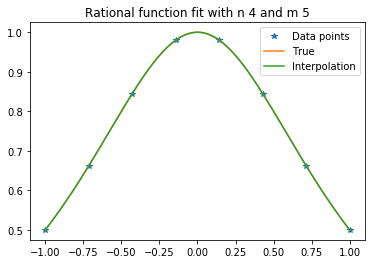

IN SUMMARY: the root mean square error for each type of interpolation is listed below:
     RATIONAL POLY:  2.5629332135065285e-16


In [7]:
#What should the error be for the Lorentzian from the rational function fit?
#VERY, VERY SMALL. ZERO with the right coefficients.
#The lorentzian is a rational function. 1/(1+x^2), with p(x) = 1 and q(x) = 1 + x^2, perfectly represented.

# n = 1, m=3 works very well:
n = 1
m = 3
num_points = n + m - 1 #make sure the number of points works for the thing
num_test_points = 1042
xi = np.linspace(-1, 1, num_points) #x data for lorentzian
yi = 1 / (1 + xi**2) # y data for lorentzian
x_test = np.linspace(xi[0], xi[-1], num_test_points)
y_true = 1 / (1 + x_test**2)
interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, DEBUG=True, SING_MAT=False, RAT_ONLY=True)


#However higher order starts to produce a pole awkwardly in the middle of the fit.
#Switching to np.linalg.pinv seems to help (done by setting SING_MAT=True)

n = 3
m = 4
num_points = n + m - 1 #make sure the number of points works for the thing
num_test_points = 1042
xi = np.linspace(-1, 1, num_points) #x data for lorentzian
yi = 1 / (1 + xi**2) # y data for lorentzian
x_test = np.linspace(xi[0], xi[-1], num_test_points)
y_true = 1 / (1 + x_test**2)

print('\n BELOW: using np.linalg.inv')
interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, SING_MAT=False, RAT_ONLY=True)
print('\n BELOW: using np.linalg.pinv')
interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, SING_MAT=True, RAT_ONLY=True)


n = 4
m = 5
num_points = n + m - 1 #make sure the number of points works for the thing
num_test_points = 1042
xi = np.linspace(-1, 1, num_points) #x data for lorentzian
yi = 1 / (1 + xi**2) # y data for lorentzian
x_test = np.linspace(xi[0], xi[-1], num_test_points)
y_true = 1 / (1 + x_test**2)

print('\n BELOW: using np.linalg.inv')
interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, SING_MAT=False, RAT_ONLY=True)
print('\n BELOW: using np.linalg.pinv')
interp_compare(n, m, num_test_points, xi, yi, x_test, y_true, SING_MAT=True, RAT_ONLY=True)


In [8]:
#And we do indeed see that with n=1 and m=3, the fitting function finds the perfect representation of
#p = 1 and q = 1+x^2, so coefficients for p = [1] and for q = [1, 0, 1], and it results in ZERO ERROR.

#But what's happening as you go to higher orders of n and m, is you're forcing a fit that looks
#less and less like the 1/(1+x**2) fit. You're adding extra redundant higher order terms to the top and the bottom.
#Using pinv means that it stops calculating the precise inverse, which is causing problems by adding poles
#in the region that we're interested in fitting, and instead does an approximate version. This approximate
#version destroys some of the extra p and q coefficients by making them 10**(-16) or so, basically zero. Then
#the fitting function looks more similar the Lorentzian and fits better.